In [1]:
import tensorflow as tf

tf.__version__

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

'1.14.0'

In [18]:
mnist = tf.keras.datasets.mnist

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

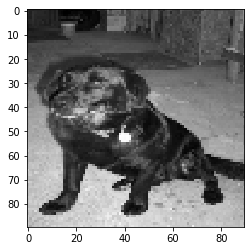

In [5]:
 # -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from tqdm import tqdm

os.getcwd()
Datadir = "/Users/priteshsrivastava/Documents/deep_learning_projects/Dogs_and_Cats/Datasets/PetImages"
IMG_SIZE = 90
Categories = ['Dog','Cat']

for category in Categories:  # do dogs and cats
    path = os.path.join(Datadir,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array, cmap='gray')  # graph it
        plt.show()  # display!
        break
    break


In [6]:
training_data = []
IMG_SIZE = 90
def create_training_data():
    for category in Categories:  # do dogs and cats
        path = os.path.join(Datadir,category)  # create path to dogs and cats
        class_num = Categories.index(category)
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
       

create_training_data()


In [7]:
print(len(training_data))

24946


In [8]:
import random 
random.shuffle(training_data)

In [9]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [10]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,1)
y = np.array(y)

In [11]:
import pickle
pickle_out = open("X.pickle", 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [12]:
X = pickle.load(open("X.pickle",'rb'))
y = pickle.load(open("y.pickle",'rb'))

In [13]:
X = X/255.0

In [14]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:])) # First Convo Layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # First Pooling layer

model.add(Conv2D(256, (3, 3))) # Second Convo Layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Second Pooling layer

model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors

model.add(Dense(64))# First Input Layer
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64)) # First Hidden Layer
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(2)) # Output Layer: Since have only two label i.e dog/cat therefore 2 perceptron in the output layer
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=1, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17462 samples, validate on 7484 samples
17462/17462 [==============================] - 832s 48ms/sample - loss: 0.6583 - acc: 0.6087 - val_loss: 0.6231 - val_acc: 0.6733


In [15]:
832/60

13.866666666666667